In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score

In [2]:
df = pd.read_csv(r"C:\Users\patil\Desktop\Know IT CADC\Practical Machine Learning\Common_Folder\Day 7\Wine.csv")
df.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1


In [3]:
x = df.drop('Customer_Segment', axis=1)
y = df['Customer_Segment']

## WIthout using PCa

In [4]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [5]:
classifier = LogisticRegression(random_state=0)
classifier.fit(x_train, y_train)

C:\Users\patil\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=0)

In [6]:
y_pred = classifier.predict(x_test)

print(confusion_matrix(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

[[13  1  0]
 [ 1 14  1]
 [ 0  0  6]]
0.9166666666666666


## With using PCa

In [7]:
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [8]:
pca = PCA(n_components=2)
x_train = pca.fit_transform(x_train)
x_test = pca.transform(x_test)

In [9]:
classifier = LogisticRegression(random_state=0)
classifier.fit(x_train, y_train)

LogisticRegression(random_state=0)

In [10]:
y_pred = classifier.predict(x_test)

print(confusion_matrix(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

[[14  0  0]
 [ 1 15  0]
 [ 0  0  6]]
0.9722222222222222


# Ploting the scatter with PCa

In [11]:
#DataFrame for PCa
PCDF = pd.DataFrame(data = pca.fit_transform(df), columns = ['PC1', 'PC2']) 
PCDF.head()

,PC1,PC2
0,318.564055,21.490773
1,303.098514,-5.366083
2,438.062063,-6.537986
3,733.240711,0.193320
4,-11.569952,18.487255


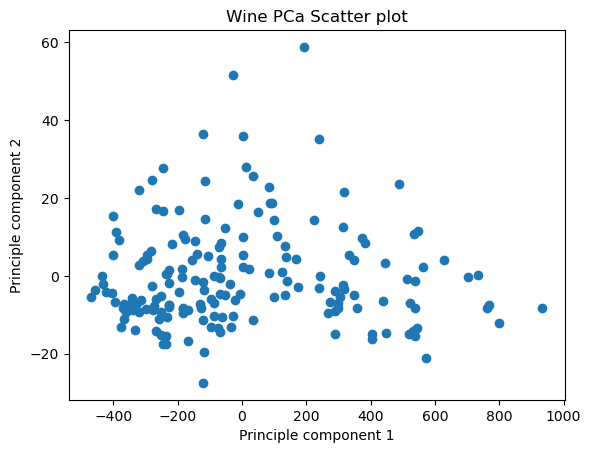

In [12]:
plt.scatter(PCDF["PC1"],PCDF["PC2"])
plt.xlabel("Principle component 1")
plt.ylabel("Principle component 2")
plt.title("Wine PCa Scatter plot")
plt.show()